# Predict housing price using machine learning regression using kaggle [dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## 1. Data Preprocessing

### 1.1 Loading the Dataset

To initiate our analysis, we do the fundamental steps to load and understand the dataset:

1. **Importing with Pandas:** We make use of the powerful Pandas library to import the dataset, facilitating efficient data handling and manipulation.

2. **Exploring the Data:** Through the utilization of Pandas functions such as `head()`, `info()`, and `describe()`, we acquire a comprehensive overview of the dataset. These functions enable us to examine the initial records, extract basic statistics, and comprehend the data's structure and types.

By conducting these preliminary tasks, we establish a robust foundation for our data analysis and subsequent decision-making processes.


In [46]:
import pandas as pd
import numpy as np

In [47]:
# Load the dataset
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Dataset Attributes**

The dataset comprises the following 10 attributes:

1. Longitude
2. Latitude
3. Housing Median Age
4. Total Rooms
5. Total Bedrooms
6. Population
7. Households
8. Median Income
9. Median House Value
10. Ocean Proximity

These attributes are largely self-explanatory. Our primary objective is to predict the "Median House Value" based on the other 9 attributes. In other words, we have 9 features (attributes) and 1 target variable.

By establishing this distinction between attributes and target, we lay the groundwork for our predictive modeling and analysis.


In [48]:
#Showuseful info about dtype and RangeIndex to easily identify missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
#Shows the missing data
data[data["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [50]:
#Give a representation of how "ocean_proximity is represented"
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 1.2 Data Imputation

In this section, we address the challenge of handling the 207 missing values in the bedroom feature. Several strategies are available for addressing this issue:

1. **Imputation Methods:** We can employ imputation techniques such as mean, median, or unsupervised methods like k-Nearest Neighbors (kNN) to estimate and fill in the missing values.

2. **Row/Column Removal:** Given the relatively limited amount of missing data, another option is to remove the affected rows/columns. In this context, we have opted to remove these rows to maintain data integrity.

Furthermore, an additional task is to convert the categorical variable *"ocean_proximity"* into a numerical representation, which is essential for compatibility with various machine learning algorithms.

By addressing these data preprocessing steps, we ensure the quality and suitability of our dataset for subsequent analysis and modeling.


In [51]:
# Drop all the missing values of the dataset
data = data.dropna()
N, M = data.shape
print(f"Dataset now has {N} Rows and {M} Columns")

Dataset now has 20433 Rows and 10 Columns


We'll use One-Hot Encoding to convert the categorical variable "ocean_proximity" into numerical values for regression.

In [52]:
data = pd.concat([data,pd.get_dummies(data.ocean_proximity, prefix='ocean')],axis=1)
data = data.drop(["ocean_proximity"],axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## 2 Exploratory data analysis
To further understand the dataset we use vizualization and intuition to identify patterns, relationships, and anomalies, and gather insights

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Histograms
using histograms of single attributs can give insights to:
1. Data Distribution (identify if the data is skewed, symmetric, or has multiple peaks)
2. Identifying Outliers 
3. Data Anomalies and Patterns

Identifying these and dealing with them is crucial, since they can affect model performance and create bias

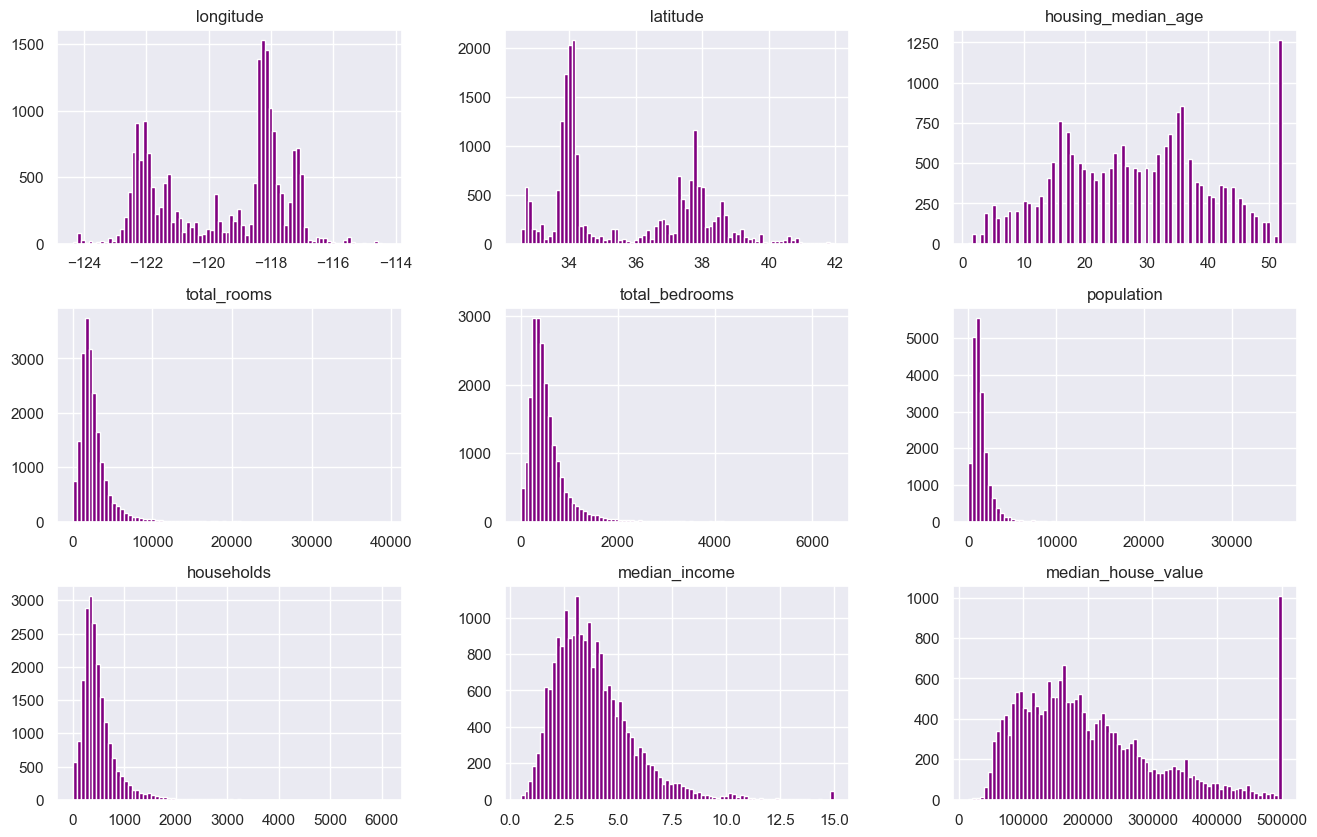

In [54]:
sns.set_theme()
pltcol = ["longitude",	"latitude",	"housing_median_age",	"total_rooms"	,"total_bedrooms",	"population","households"	,"median_income","median_house_value"]
data[pltcol].hist(bins=80,figsize=(16,10),color="purple")
plt.show()

* Notably, there are distinctive outlier distributions and unusual patterns observed in `median_house_value` and `housing_median_age` as compared to the remaining attributes. This discrepancy could arise from sample bias. It is worth highlighting a significant peak at approximately $500,000 within the `median_house_value` distribution.
* Furthermore, a few distributions within the dataset exhibit skewness.


### 2.2 Correlation Matrix

The correlation matrix serves several important purposes in data analysis and feature selection:

- **Pattern Identification:** It aids in recognizing and visualizing relationships between features, enabling the detection of underlying patterns within the dataset.

- **Feature Correlation:** The matrix is a powerful tool to identify features that exhibit high or low correlations. In cases of excessive correlation, dropping one of the correlated features can help reduce multicollinearity.

- **Feature Importance:** The correlation matrix is instrumental in revealing features that strongly influence the target variable, assisting in the identification of key predictors.

Utilizing the correlation matrix enhances our ability to understand and select relevant features, ultimately contributing to the refinement of our analytical processes.


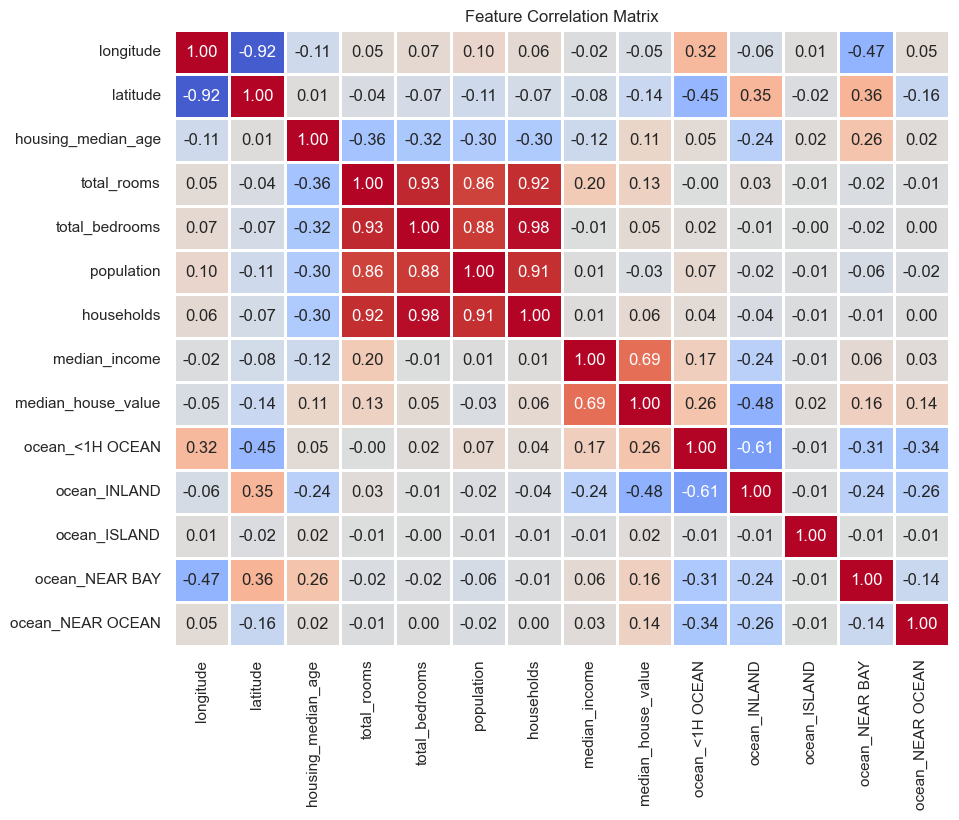

In [55]:
# Compute the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5,square=False,lw=2,cbar=False,vmin=-1,vmax=1,center=0)
plt.title('Feature Correlation Matrix')
plt.show()

* Notably, `median_house_value` exhibits relatively strong correlations with `median_income` and `ocean_INLAND`. This suggests their potential significance as influential factors in the regression model.

* Conversely, attributes like `total_bedrooms` and `population` show minimal correlations of 0.05 and -0.03, respectively. In the context of a relatively straightforward model where nonlinearity is considered, these low correlations may warrant consideration for exclusion.


## 3. Dealing with outliers
Methods for managing outliers include:

1. **Removal:** Deleting entries with outliers. However, this may result in significant data loss if outliers are present across multiple variables.

2. **Value Replacement:** Treating outliers as missing values and imputing suitable replacements.

3. **Capping:** Replacing extreme values with arbitrary or distribution-based values.

4. **Discretization:** Converting continuous variables into discrete intervals or bins.


`median_house_value` and `housing_median_age` had notable patterns. 
* For the `median_house_value` it might be due to a summation of all values above this threshold and we can deal with them by removing everything at the maximum value
* The `housing_median_age` might be valid since it has 


* The skewness of many attributes could be turned into a normal or less-skewed distribution Transformation, however, since we are making a linear regression model we chose not to do anything as it is not very sensitive to skewed data

In [56]:
mhv_max = data["median_house_value"].max()
rm = data[data["median_house_value"] == mhv_max].shape[0]
print(f"We are removing {rm} rows")

data_new = data[data["median_house_value"] != mhv_max]

We are removing 958 rows


## 4. Creating model

### 4.1 Splitting data to training & test

In [57]:
from sklearn.model_selection import train_test_split

X = data_new.drop(columns=["median_house_value"])
y= data_new["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.model_selection import train_test_split

X_c = data.drop(columns=["median_house_value"])
y_c = data["median_house_value"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

### 4.2 Constructing a Linear Regression Model

In this section, we use linear regression to predict the `median_house_value`, comparing our results against those from a 'DummyRegressor'.


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Models using the updated data

In [60]:
linear_model = LinearRegression()
dummy_model = DummyRegressor()


linear_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')


dummy_scores = cross_val_score(dummy_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Dummy regression: {np.sqrt(-dummy_scores)}")
print(f"Linear regression: {np.sqrt(-linear_scores)}")

Dummy regression: [99657.93826908 98070.16989345 97323.95822972 97275.862282
 96578.62635598]
Linear regression: [64678.21028145 61543.08560861 60894.24463537 59706.11514696
 59582.97711466]


Models using the unchanged data

In [61]:
linear_model = LinearRegression()
dummy_model = DummyRegressor()


linear_scores = cross_val_score(linear_model, X_train_c, y_train_c, cv=5, scoring='neg_mean_squared_error')


dummy_scores = cross_val_score(dummy_model, X_train_c, y_train_c, cv=5, scoring='neg_mean_squared_error')
print(f"Dummy regression: {np.sqrt(-dummy_scores)}")
print(f"Linear regression: {np.sqrt(-linear_scores)}")

Dummy regression: [113867.843229   112646.90301961 115664.58341075 119616.35934212
 115239.60366597]
Linear regression: [67581.73660917 68950.83540552 68061.22113227 72814.30841959
 69051.53887167]


We see that the removal of outliers had a small effect on the model error

Using a pipeline approach to simultaneously incorporate model scaling and cross-validation

In [62]:
# Create a dictionary of classifiers
classifiers = {
    "Linear Regression": LinearRegression(),
    "Dummy Regression": DummyRegressor(),
}

# Dictionary to store the cross-validation scores
cv_scores = {}

# Cross-validation and store the results
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    scores = np.sqrt(-cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    cv_scores[name] = scores

cv_scores

{'Linear Regression': array([64669.90740253, 61543.08560861, 60894.24463537, 59706.11514696,
        59582.97711466]),
 'Dummy Regression': array([99657.93826908, 98070.16989345, 97323.95822972, 97275.862282  ,
        96578.62635598])}

Scaling seems to have limited influence on the model's performance, with the error persistently high for this particular task.

To bolster the model's accuracy, potential avenues for improvement include:

- Improving the dataset quality or refining the process of generating and modifying the feature matrix (*Feature Engineering*).
- Exploring different regression models.
- Mitigating skewness through corrective measures and conducting an exhaustive feature-by-feature analysis.
- Implementing regularization techniques like Ridge or Lasso regression.

Although these strategies may not guarantee a definitive reduction in error, they warrant careful consideration and investigation.
